In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Owner\Desktop\a\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\archive\tested.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
titantic = df.isna().sum().sort_values(ascending=False)
titantic = titantic[titantic>107]
titantic

Cabin    327
dtype: int64

In [9]:
# checking what % colunm contain missing values
df.isnull().sum().sort_values(ascending=False)*100/len(df)


Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [10]:
df.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<Axes: xlabel='Survived', ylabel='Fare'>

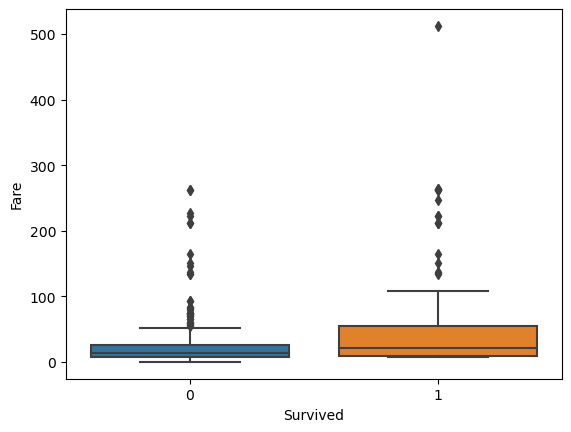

In [13]:
sns.boxplot(x='Survived',y='Fare',data=df)

In [15]:
df[df['Fare']>300]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)


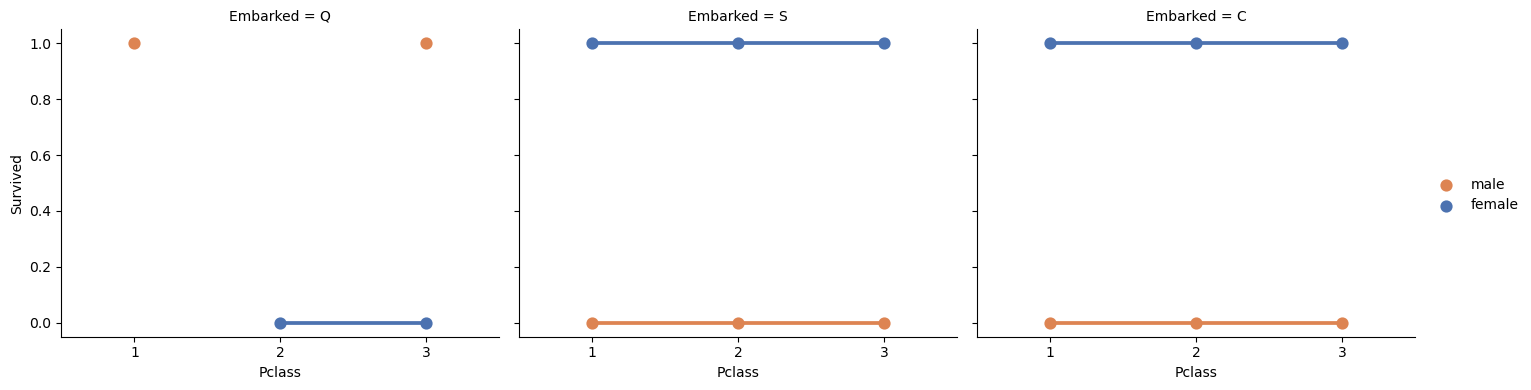

In [16]:
FacetGrid = sns.FacetGrid(df, col='Embarked', height=4, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep', order=None, hue_order=None)
FacetGrid.add_legend()


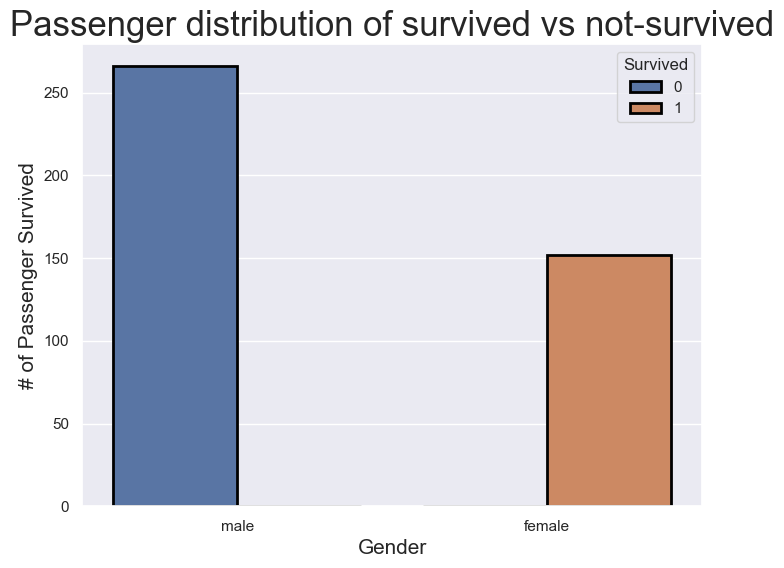

In [18]:
sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='Sex', data = df, hue='Survived', edgecolor=(0,0,0), linewidth=2)
# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("# of Passenger Survived", fontsize = 15)
labels = ['Female', 'Male']

([<matplotlib.axis.XTick at 0x1f5df8702d0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

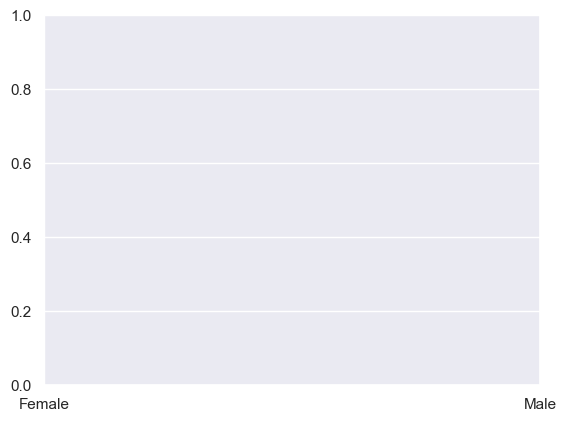

In [20]:
plt.xticks(sorted(df.Survived.unique()),labels)


In [29]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [31]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64'])

# Calculating the mean
result = numeric_df.mean()


In [36]:
gender_counts = df['Sex'].value_counts()
print("\nNumber of passengers by gender:")
print(gender_counts)



Number of passengers by gender:
Sex
male      266
female    152
Name: count, dtype: int64


In [37]:
average_age = df['Age'].mean()
print("\nAverage age of passengers:", average_age)



Average age of passengers: 30.272590361445783


In [38]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:")
print(survival_by_class)


Survival rate by passenger class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


In [39]:
sibsp_counts = df['SibSp'].value_counts()
print("\nNumber of passengers with siblings/spouses aboard:")
print(sibsp_counts)



Number of passengers with siblings/spouses aboard:
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64


In [40]:
parch_counts = df['Parch'].value_counts()
print("\nNumber of passengers with parents/children aboard:")
print(parch_counts)



Number of passengers with parents/children aboard:
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64


In [41]:
embarked_counts = df['Embarked'].value_counts()
print("\nNumber of passengers embarked at different ports:")
print(embarked_counts)



Number of passengers embarked at different ports:
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


In [45]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by passenger class:")
print(survival_by_class)



Survival rate by passenger class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Passenger Class Distribution - Survived')

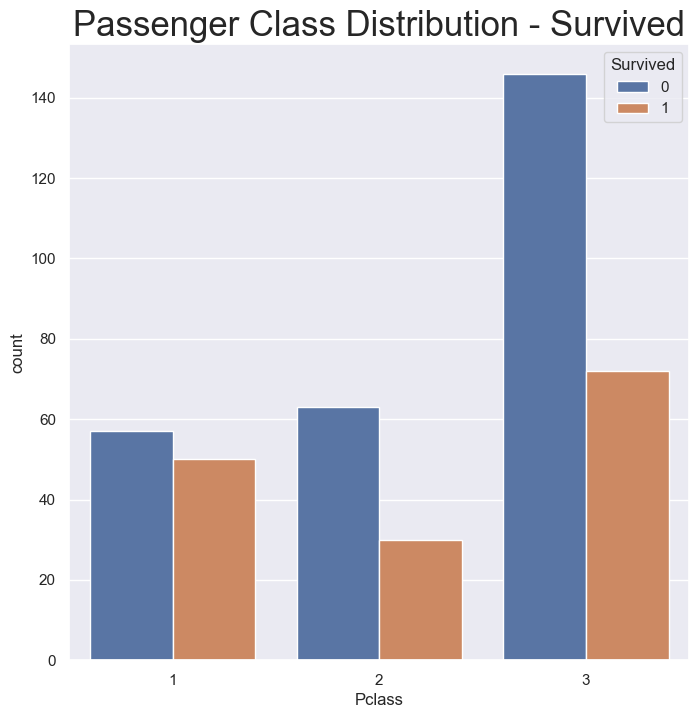

In [48]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Passenger Class Distribution - Survived", fontsize = 25)

C:\Users\Owner\AppData\Local\Temp\ipykernel_19300\3767756971.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Owner\AppData\Local\Temp\ipykernel_19300\3767756971.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

AttributeError: 'DataFrame' object has no attribute 'pclass'

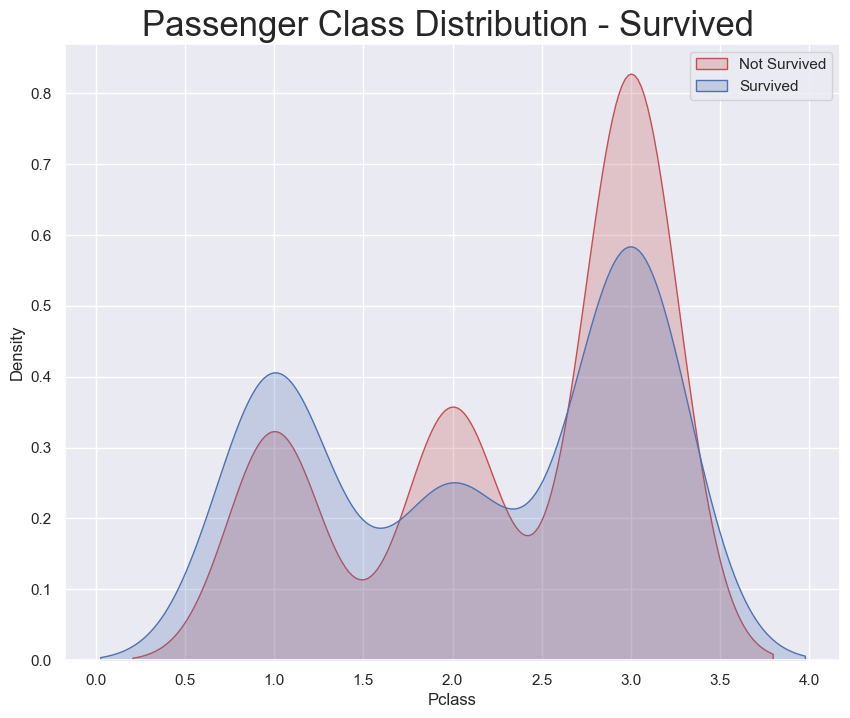

In [49]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'],shade=True,color='b',label='Survived')
ax.legend()
plt.title("Passenger Class Distribution - Survived ", fontsize = 25)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.pclass.unique()),labels)

Text(0.5, 1.0, 'Passenger Class Distribution - Survived Passengers')

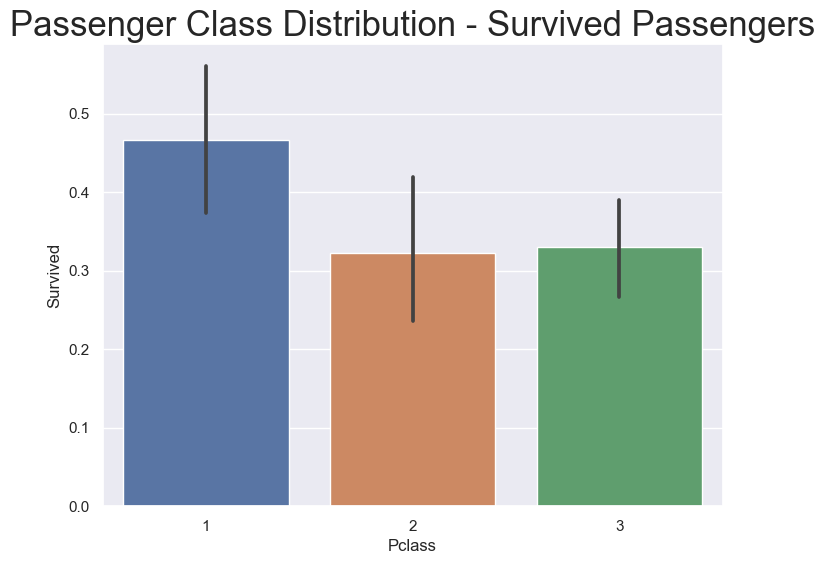

In [50]:
plt.subplots(figsize = (8,6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Passenger Class Distribution - Survived Passengers", fontsize = 25)


C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Owner\Desktop\a\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


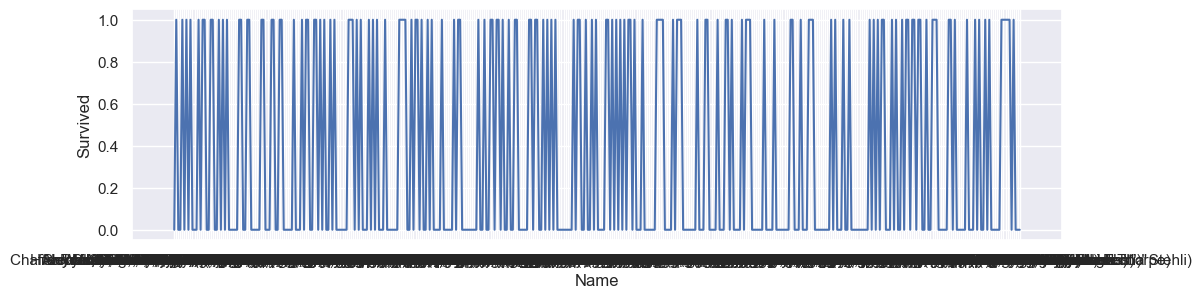

In [65]:
plt.subplots(figsize = (12,3))
ax = sns.lineplot(x='Name',y='Survived', data=df)